In [35]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

from graph2net.ops import op_to_idx

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

np.set_printoptions(linewidth=150)
pd.set_option('display.max_columns', 500)

In [111]:
df = pd.read_pickle('run_stats.pkl')

df = df[df['params']>1e6]
df = df[df['scale'].notnull()]
df = df[df['run_date'].apply(lambda x: x is not None and '2018-10' not in x)]
df['start_size']=df['scale'].apply(lambda x: 2**x)
df['reductions']=df['cell_types'].apply(sum)
df['cell']=df['cell_matrices'].apply(lambda x: np.array(x[0]) if len(x)<3 else np.array(x))
df['parallel']=df['cell_matrices'].apply(lambda x: len(x) if len(x)<3 else 1)
df['cells']=df['cell_types'].apply(len)
df['nodes']=df['cell'].apply(len)

for i in range(len(op_to_idx)):
    df['op_{}'.format(i)]=df['cell'].apply(lambda x: len(np.where(x==i)[0]))
df


,cell_matrices,cell_types,curve,data,drop_path,early_terminate,epoch,epochs,log,lr,lr_schedule,max,momentum,params,per_epoch_time,predictions,prefix,residual_cells,run_date,scale,scales,time_taken,track_progess,track_progress,verbose,weight_decay,start_size,reductions,cell,parallel,cells,nodes,op_0,op_1,op_2,op_3,op_4,op_5,op_6,op_7,op_8,op_9,op_10,op_11,op_12,op_13,op_14,op_15
65,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]",[],NaN,True,True,0,512.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",NaN,0.9,26408062.0,None,[],NaN,NaN,2018-11-01 15:30:08,3.0,"[(2.0, 0.5), (2.0, 0.5)]",14.48 s,NaN,NaN,True,0.0001,8.0,5,"[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [0...",2,13,6,25,1,2,0,0,1,0,0,1,2,1,0,0,1,1,1
66,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]",[],NaN,True,False,0,512.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",NaN,0.9,26408062.0,None,[],NaN,NaN,2018-11-01 15:31:51,3.0,"[(2.0, 0.5), (2.0, 0.5)]",None,NaN,NaN,True,0.0001,8.0,5,"[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [0...",2,13,6,25,1,2,0,0,1,0,0,1,2,1,0,0,1,1,1
67,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]","[3518, 3866, 4017, 4876, 4339, 5422, 5818, 610...",NaN,True,False,9,512.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",6107.0,0.9,26408062.0,None,[],NaN,NaN,2018-11-01 15:32:53,3.0,"[(2.0, 0.5), (2.0, 0.5)]",None,NaN,NaN,True,0.0001,8.0,5,"[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [0...",2,13,6,25,1,2,0,0,1,0,0,1,2,1,0,0,1,1,1
68,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 1, 0, 1, 0, 1, 0, 1]",[],NaN,True,False,0,512.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",NaN,0.9,22124242.0,None,[],NaN,NaN,2018-11-02 10:20:55,3.0,"[(2.0, 0.5), (2.0, 0.5)]",None,NaN,NaN,True,0.0001,8.0,5,"[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [0...",2,9,6,25,1,2,0,0,1,0,0,1,2,1,0,0,1,1,1
69,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 1, 0, 1, 0, 1]","[1000, 1000]",NaN,True,True,2,512.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",1000.0,0.9,5598322.0,None,[],NaN,NaN,2018-11-02 10:23:32,3.0,"[(2.0, 0.5), (2.0, 0.5)]","3 min, 46 s",NaN,NaN,True,0.0001,8.0,4,"[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [0...",2,7,6,25,1,2,0,0,1,0,0,1,2,1,0,0,1,1,1
70,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 1, 0, 1, 0, 1]",[],NaN,True,True,0,512.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",NaN,0.9,5598322.0,None,[],NaN,NaN,2018-11-02 10:27:19,3.0,"[(2.0, 0.5), (2.0, 0.5)]",2.85 s,NaN,NaN,True,0.0001,8.0,4,"[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [0...",2,7,6,25,1,2,0,0,1,0,0,1,2,1,0,0,1,1,1
71,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 1, 0, 1, 0, 1]",[],NaN,True,True,0,512.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",NaN,0.9,5598322.0,None,[],NaN,NaN,2018-11-02 10:27:25,3.0,"[(2.0, 0.5), (2.0, 0.5)]",13.55 s,NaN,NaN,True,0.0001,8.0,4,"[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [0...",2,7,6,25,1,2,0,0,1,0,0,1,2,1,0,0,1,1,1
72,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 1, 0, 1, 0, 1]",[],NaN,True,True,0,512.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.00...",NaN,0.9,5598322.0,None,[],NaN,NaN,2018-11-02 10:27:51,3.0,"[(2.0, 0.5), (2.0, 0.5)]",2.83 s,NaN,NaN,True,0.0001,8.0,4,"[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [0...",2,7,6,25,1,2,0,0,1,0,0,1,2,1,0,0,1,1,1
73,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 1, 0, 1, 0, 1]",[],NaN,True,True,0,512.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.00...",NaN,0.9,5598322.0,None,[],NaN,NaN,2018-11-02 10:27:55,3.0,"[(2.0, 0.5), (2.0, 0.5)]",16.96 s,NaN,NaN,True,0.0001,8.0,4,"[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [0...",2,7,6,25,1,2,0,0,1,0,0,1,2,1,0,0,1,1,1
74,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 1, 0, 1, 0, 1]",[],NaN,True,True,0,512.0

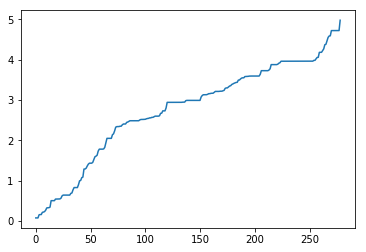

In [119]:
df['param_norm']=df['params'].apply(lambda x: np.log2(x/1e6))
df = df.sort_values(by='params').reset_index(drop=True)
plt.plot(df['param_norm'])

['reductions', 'parallel', 'cells', 'nodes', 'scale', 'start_size', 'op_0', 'op_1', 'op_2', 'op_3', 'op_4', 'op_5', 'op_6', 'op_7', 'op_8', 'op_9', 'op_10', 'op_11', 'op_12', 'op_13', 'op_14', 'op_15']
Train/test sizes: 209, 70


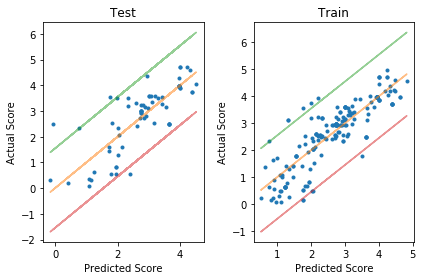

Intercept: -4.976546496202418
Coefficients: 
    reductions: 0.2487 
    parallel: -0.3776 
    cells: 0.0588 
    nodes: 0.3664 
    scale: 1.1674 
    start_size: -0.0346 
    op_0: 0.0008 
    op_1: -0.2598 
    op_2: 1.0022 
    op_3: -2.3019 
    op_4: -0.1047 
    op_5: -0.1231 
    op_6: -0.2421 
    op_7: -0.2010 
    op_8: 0.7610 
    op_9: 0.2181 
    op_10: -0.0047 
    op_11: 0.0506 
    op_12: -0.1137 
    op_13: -0.1222 
    op_14: -0.1983 
    op_15: 0.0208
95%: ±1.55


,reductions,parallel,cells,nodes,scale,start_size,op_0,op_1,op_2,op_3,op_4,op_5,op_6,op_7,op_8,op_9,op_10,op_11,op_12,op_13,op_14,op_15,intercept,pred,_score,Error
87,0.994753,-0.755222,0.411681,2.198463,3.502082,-0.276959,0.020580,-0.259807,2.004330,-0.0,-0.000000,-0.123064,-0.000000,-0.000000,0.760999,0.436224,-0.004746,0.000000,-0.000000,-0.122231,-0.198328,0.020764,-4.976546,12.406053,5.598322,-6.807731
170,1.243441,-0.377611,0.764550,1.832052,5.836803,-1.107836,0.013995,-0.779421,0.000000,-0.0,-0.104697,-0.000000,-0.242051,-0.000000,0.760999,0.000000,-0.004746,0.000000,-0.000000,-0.122231,-0.000000,0.000000,-4.976546,6.665443,9.308106,2.642663
127,1.243441,-0.377611,0.764550,1.832052,5.836803,-1.107836,0.014818,-1.299034,0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,0.760999,0.000000,-0.000000,0.050570,-0.000000,-0.000000,-0.000000,0.000000,-4.976546,6.690922,7.682986,0.992064
103,1.243441,-0.377611,0.764550,2.564873,5.836803,-1.107836,0.032928,-0.519614,0.000000,-0.0,-0.104697,-0.000000,-0.242051,-0.000000,0.000000,0.218112,-0.000000,0.050570,-0.113746,-0.122231,-0.000000,0.020764,-4.976546,8.986185,5.833930,-3.152255
275,1.243441,-0.755222,0.764550,2.198463,3.502082,-0.276959,0.020580,-0.259807,2.004330,-0.0,-0.000000,-0.123064,-0.000000,-0.000000,0.760999,0.436224,-0.004746,0.000000,-0.000000,-0.122231,-0.198328,0.020764,-4.976546,18.824371,26.408062,7.583691
31,1.243441,-0.377611,0.529304,1.832052,3.502082,-0.276959,0.014818,-0.000000,0.000000,-0.0,-0.000000,-0.123064,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.202280,-0.000000,-0.122231,-0.198328,0.000000,-4.976546,2.377156,1.558522,-0.818634
268,1.243441,-0.377611,0.764550,2.564873,5.836803,-1.107836,0.030459,-1.039227,0.000000,-0.0,-0.000000,-0.000000,-0.242051,-0.000000,1.521997,0.436224,-0.004746,0.000000,-0.000000,-0.122231,-0.198328,0.000000,-4.976546,20.109012,24.052522,3.943510
272,1.243441,-0.755222,0.529304,2.198463,3.502082,-0.276959,0.020580,-0.259807,2.004330,-0.0,-0.000000,-0.123064,-0.000000,-0.000000,0.760999,0.436224,-0.004746,0.000000,-0.000000,-0.122231,-0.198328,0.020764,-4.976546,15.992056,26.385610,10.393554
187,1.243441,-0.377611,0.764550,2.198463,5.836803,-1.107836,0.019757,-1.299034,0.000000,-0.0,-0.000000,-0.000000,-0.242051,-0.000000,0.760999,0.000000,-0.004746,0.000000,-0.113746,-0.366694,-0.000000,0.000000,-4.976546,5.048125,11.489002,6.440877
18,1.243441,-0.377611,0.764550,1.465642,7.004164,-2.215672,0.009879,-0.259807,0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.200992,0.000000,0.000000,-0.000000,0.050570,-0.113746,-0.000000,-0.000000,0.000000,-4.976546,5.255655,1.455178,-3.800477


2.915751314825071


In [122]:
verbose = True

train,test = train_test_split(df,test_size=.25)
        
regr = linear_model.LinearRegression()
selector = ['reductions','parallel','cells','nodes','scale','start_size']
selector += ['op_{}'.format(i) for i in range(len(op_to_idx))]


train_X = train[selector]
train_Y = train['param_norm']

test_X = test[selector]
test_Y = test['param_norm']


regr = linear_model.LinearRegression()
regr.fit(train_X,train_Y)
x_func = regr.intercept_+np.dot(train_X,regr.coef_)
pred = regr.intercept_+np.dot(test_X,regr.coef_)
c95 = np.std(test_Y.values-pred)*1.96



if verbose:
    print(selector)
    print("Train/test sizes: {}, {}".format(len(train_X),len(test_X)))

    plt.subplot(121)
    plt.plot(pred,test_Y,".")
    plt.plot(pred,pred,alpha=.5)
    plt.plot(pred,pred+c95,alpha=.5)
    plt.plot(pred,pred-c95,alpha=.5)
    plt.xlabel("Predicted Score")
    plt.ylabel("Actual Score")
    plt.title("Test")

    plt.subplot(122)
    plt.plot(x_func,train_Y,".")
    plt.plot(x_func,x_func,alpha=.5)
    plt.plot(x_func,x_func+c95,alpha=.5)
    plt.plot(x_func,x_func-c95,alpha=.5)
    plt.xlabel("Predicted Score")
    plt.ylabel("Actual Score")
    plt.title("Train")
    plt.tight_layout()

    plt.show()
    
    print('Intercept:', regr.intercept_)
    print('Coefficients:', *["\n    {}: {:.4f}".format(list(train_X)[i],x) for (i,x) in enumerate(regr.coef_)])
    print("95%: ±{:.2f}".format(c95))
    
    xy_df = pd.DataFrame(test_X*regr.coef_)
    xy_df['intercept']=regr.intercept_
    xy_df['pred']=xy_df.apply(lambda x: 2**sum(x),1)
    xy_df['_score']=2**test_Y
    xy_df['Error']=(xy_df['_score']-xy_df['pred'])
    display(xy_df.sample(n=50))
    print(np.mean(np.sqrt((xy_df['Error']**2))))

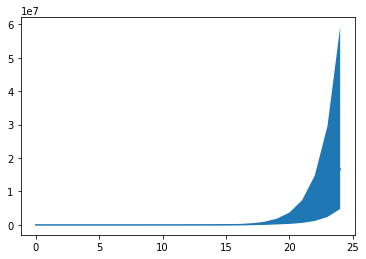

In [82]:
x = range(0,25)
y = [2**i for i in x]
cPlus = [2**(i+c95) for i in x]
cMinus = [2**(i-c95) for i in x]

plt.plot(x,y)
plt.fill_between(x,cPlus,cMinus)